# Football & Artificial Intelligence: Data Science Project MARC AVILA PEDEMONTE

## Introduction 📋

Humanity is currently undergoing a third major wave of revolutionary ideas, this time centered on the domestication of information. As previous revolutions that transformed the way life is lived and understood were driven by the domestication of food and energy, the 21st century is being defined by the capacity to domesticate information. At the core of this transformation is data, serving as the raw material that fuels this paradigm shift.

From data arises information, and in the 21st century, information is power. Both corporations and governments now recognize that mastery of information confers strategic and competitive advantages.

Consider the following scenario: two football teams are playing, but no prior knowledge about them is available. In the absence of data, any prediction would amount to a random 50/50 guess. However, as relevant pieces of information become available (such as league standings, historical results, injury reports, and player performance) understanding improves. Predictions become more accurate, as increased data availability leads to enhanced knowledge, which in turn improves the likelihood of making informed decisions.

When this logic is extended to a global scale, the implications become profound. It is now possible to extract data from virtually any element, such as player fatigue, movement patterns, distance covered, or substitution outcomes, and computational systems are available to process this data efficiently. The large-scale utilization of data to generate insights can be applied across domains including business, politics, healthcare, and defense, thereby enabling strategic, evidence-based decisions that enhance the probability of success.

For this reason, information has emerged as the most valuable resource of the 21st century. It is the most sought-after asset across all sectors: government, industry, political organizations, and military institutions. The intrinsic value does not reside in raw data itself. In isolation, data remains unrefined—a rough diamond. The true value lies in the ability to transform data into actionable and meaningful information.

## Creating a Pass Probability Model 🧪

This project aims to demonstrate just one of the countless applications that artificial intelligence can have in the world of football. It also serves as a personal introduction to the field of data science applied to the sport I’m most passionate about. The main goal is to learn and grow by exploring how data can be used to understand and improve decision-making in football.

In this project, a **Pass Probability Model** will be built and trained using a dataset that combines event data and tracking data from multiple professional matches across a full season. The model’s main objective is to predict, based on a set of features, the likelihood of a pass being successful or not.

### 1. Data Collection 🪨🛒

To clarify, there are essentially two main types of football data:

>⚽ **_Event data_** is a log of all on-the-ball actions, such as passes, shots, tackles, recoveries, or dribbles. It includes information about when and where each event occurs on the pitch, and which players are involved. This results in a few thousand events per match. However, it only captures what happens around the ball, meaning we don’t know the positions of players who are not directly involved in the play.

>📽️ **_Tracking data_**, on the other hand, provides a continuous measurement of the location of all 22 players on the pitch throughout the match. This gives a much richer and more complete understanding of positioning, movement, and spatial dynamics. 
In fact, on average, a player only has possession of the ball for around 3 minutes per game, so how can their performance be evaluated during the other 87 minutes? That’s where tracking data becomes essential, as it allows to analyze off-the-ball behavior, tactical positioning, space creation, and defensive contribution.

Tracking data captures a large part of what truly happens on the pitch. Every time a player has the ball or performs an action, dozens of things are simultaneously happening around them: positioning, pressing, runs, space creation, and more. For most of the 90 minutes, players are not in direct contact with the ball, but their movement and spatial roles still have significant impact on the game.
This kind of data is extremely rich and, when properly processed, can bring enormous value to models like this one, enabling the extraction of more sophisticated and abundant metrics that go far beyond surface-level statistics.

By combining these two data sources, the model aims to extract meaningful patterns and provide insight into the success probability of passing actions. This kind of approach is increasingly relevant in modern football analytics and can support tactical analysis, player evaluation, and decision-making at a professional level.


This project uses data from the public soccer event dataset by Pappalardo et al. (2019). If you use this dataset, please cite the following papers:
- Pappalardo et al. (2019). *A public data set of spatio-temporal match events in soccer competitions*, Nature Scientific Data 6:236. https://www.nature.com/articles/s41597-019-0247-7  
- Pappalardo et al. (2019). *PlayeRank: Data-driven Performance Evaluation and Player Ranking in Soccer via a Machine Learning Approach*, ACM TIST 10(5), Article 59. https://doi.org/10.1145/3343172
For more information, please visit: https://figshare.com/collections/_/4415000.

Additionally, AI-based techniques have been used to generate synthetic tracking data, helping enrich the dataset and simulate realistic player movements and positioning.

In [1]:
# Importation of the necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


# Option to display all data-frame columns without cutting them off
pd.set_option('display.max_columns', None)

All the data used in this project comes from Spain’s top-tier professional football league (LaLiga) during the 2017-2018 season.

In [2]:
# Reading of the events file
with open("events_Spain.json", "r") as f:
    events = json.load(f)

# Conversion of all events to a flat data-frame
df_events_spain = pd.json_normalize(events)

# Displaying the number of rows
df_events_spain.shape[0]

628659

In [3]:
# Inspecting the overall shape of the data
df_events_spain.head(2)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418


In [4]:
# Checking all recorded events
df_events_spain['eventName'].unique()

array(['Pass', 'Duel', 'Others on the ball', 'Shot', 'Save attempt',
       'Interruption', 'Free Kick', 'Foul', 'Offside',
       'Goalkeeper leaving line'], dtype=object)

In [5]:
# Filtering the data-frame to keep only pass events
df_passes= df_events_spain[df_events_spain['eventName'] == 'Pass']
df_passes.shape[0]

318722

In [6]:
# Importation of a library to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# The data-frame is processed to extract the 'id' of each row
df_passes['tag_id'] = df_passes['tags'].apply(lambda x: x[0]['id'] 
                                              if x and isinstance(x, list) and isinstance(x[0], dict) 
                                              and 'id' in x[0] else None)

df_passes.head(3)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tag_id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419,1801
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418,1801
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420,1801


In [7]:
# Loading tag data
df_tags = pd.read_csv("tags2name.csv")
df_tags.head(3)

,Tag,Label,Description
0,101,Goal,Goal
1,102,own_goal,Own goal
2,301,assist,Assist


In [8]:
# Merging tag information to identify pass outcomes
df_passes = pd.merge(df_passes, df_tags, left_on = 'tag_id', right_on = 'Tag', how = 'left')
df_passes.head(3)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tag_id,Tag,Label,Description
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419,1801,1801,accurate,Accurate
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418,1801,1801,accurate,Accurate
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420,1801,1801,accurate,Accurate


In [9]:
# As the interpretation of the counter_attack label is not known, it will be excluded to avoid adding noise or model errors
df_passes = df_passes[df_passes['Label'] != 'counter_attack']
df_passes = df_passes[df_passes['Label'] != 'head/body']
df_passes = df_passes[df_passes['Label'] != 'fairplay']

df_passes.shape[0]

313442

In [10]:
# Analyzing the distribution of tag types linked to each pass
df_passes['Label'].value_counts()

accurate               243939
not accurate            37078
interception            13043
Right                    6268
through                  5386
Left                     4856
keyPass                  1858
assist                    547
dangerous_ball_lost       464
own_goal                    3
Name: Label, dtype: int64

A simple mapping of the different tags is performed to distinguish between successful and unsuccessful passes. In this case, the passes are grouped as follows:

* ✅**Successful passes**: Accurate

* ❌**Unsuccessful passes**: Not Accurate

In [11]:
# Keeping only records labeled as accurate or not accurate to ensure consistency
df_passes = df_passes[df_passes['Label'].isin(['accurate', 'not accurate'])]

In [12]:
# Number of registers remaining
df_passes['Label'].shape[0]

281017

In [13]:
# Creating the 'successful' column using the mapping described above
df_passes['Successfull'] = df_passes['Label'].map({'accurate':int(1), 'not accurate':int(0)})

# Checking that it was done correctly
df_passes['Successfull'].value_counts()

1    243939
0     37078
Name: Successfull, dtype: int64

The following steps involve reading various files that will enrich the event data.

- Matches⚔️
- Teams👕
- Players🏃‍
- Tracking📽️

In [14]:
# Reading of the matches file
with open("matches_Spain.json", "r") as f:
    matches = json.load(f)

# Converting all matches to a flat data-frame
df_matches = pd.json_normalize(matches)
df_matches.head(2)

,status,roundId,gameweek,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId,teamsData.676.scoreET,teamsData.676.coachId,teamsData.676.side,teamsData.676.teamId,teamsData.676.score,teamsData.676.scoreP,teamsData.676.hasFormation,teamsData.676.formation.bench,teamsData.676.formation.lineup,teamsData.676.formation.substitutions,teamsData.676.scoreHT,teamsData.687.scoreET,teamsData.687.coachId,teamsData.687.side,teamsData.687.teamId,teamsData.687.score,teamsData.687.scoreP,teamsData.687.hasFormation,teamsData.687.formation.bench,teamsData.687.formation.lineup,teamsData.687.formation.substitutions,teamsData.687.scoreHT,teamsData.679.scoreET,teamsData.679.coachId,teamsData.679.side,teamsData.679.teamId,teamsData.679.score,teamsData.679.scoreP,teamsData.679.hasFormation,teamsData.679.formation.bench,teamsData.679.formation.lineup,teamsData.679.formation.substitutions,teamsData.679.scoreHT,teamsData.701.scoreET,teamsData.701.coachId,teamsData.701.side,teamsData.701.teamId,teamsData.701.score,teamsData.701.scoreP,teamsData.701.hasFormation,teamsData.701.formation.bench,teamsData.701.formation.lineup,teamsData.701.formation.substitutions,teamsData.701.scoreHT,teamsData.691.scoreET,teamsData.691.coachId,teamsData.691.side,teamsData.691.teamId,teamsData.691.score,teamsData.691.scoreP,teamsData.691.hasFormation,teamsData.691.formation.bench,teamsData.691.formation.lineup,teamsData.691.formation.substitutions,teamsData.691.scoreHT,teamsData.678.scoreET,teamsData.678.coachId,teamsData.678.side,teamsData.678.teamId,teamsData.678.score,teamsData.678.scoreP,teamsData.678.hasFormation,teamsData.678.formation.bench,teamsData.678.formation.lineup,teamsData.678.formation.substitutions,teamsData.678.scoreHT,teamsData.674.scoreET,teamsData.674.coachId,teamsData.674.side,teamsData.674.teamId,teamsData.674.score,teamsData.674.scoreP,teamsData.674.hasFormation,teamsData.674.formation.bench,teamsData.674.formation.lineup,teamsData.674.formation.substitutions,teamsData.674.scoreHT,teamsData.677.scoreET,teamsData.677.coachId,teamsData.677.side,teamsData.677.teamId,teamsData.677.score,teamsData.677.scoreP,teamsData.677.hasFormation,teamsData.677.formation.bench,teamsData.677.formation.lineup,teamsData.677.formation.substitutions,teamsData.677.scoreHT,teamsData.675.scoreET,teamsData.675.coachId,teamsData.675.side,teamsData.675.teamId,teamsData.675.score,teamsData.675.scoreP,teamsData.675.hasFormation,teamsData.675.formation.bench,teamsData.675.formation.lineup,teamsData.675.formation.substitutions,teamsData.675.scoreHT,teamsData.682.scoreET,teamsData.682.coachId,teamsData.682.side,teamsData.682.teamId,teamsData.682.score,teamsData.682.scoreP,teamsData.682.hasFormation,teamsData.682.formation.bench,teamsData.682.formation.lineup,teamsData.682.formation.substitutions,teamsData.682.scoreHT,teamsData.696.scoreET,teamsData.696.coachId,teamsData.696.side,teamsData.696.teamId,teamsData.696.score,teamsData.696.scoreP,teamsData.696.hasFormation,teamsData.696.formation.bench,teamsData.696.formation.lineup,teamsData.696.formation.substitutions,teamsData.696.scoreHT,teamsData.680.scoreET,teamsData.680.coachId,teamsData.680.side,teamsData.680.teamId,teamsData.680.score,teamsData.680.scoreP,teamsData.680.hasFormation,teamsData.680.formation.bench,teamsData.680.formation.lineup,teamsData.680.formation.substitutions,teamsData.680.scoreHT,teamsData.698.scoreET,teamsData.698.coachId,teamsData.698.side,teamsData.698.teamId,teamsData.698.score,teamsData.698.scoreP,teamsData.698.hasFormation,teamsData.698.formation.bench,teamsData.698.formation.lineup,teamsData.698.formation.substitutions,teamsData.698.scoreHT,teamsData.683.scoreET,teamsData.683.coachId,teamsData.683.side,teamsData.683.teamId,teamsData.683.score,teamsData.683.scoreP,teamsData.683.hasFormation,teamsData.683.formation.bench,teamsData.683.formation.lineup,teamsData.683.formation.substitutions,teamsData.683.scoreHT,teamsData.714.scoreET,teamsData.714.coachId,teamsData.714.side,teamsData.71

In [15]:
# The dataset is reduced to the relevant columns and their names are updated
df_matches = df_matches[['wyId', 'label', 'dateutc', 'venue']]
df_matches['match_score'] = df_matches['label']
df_matches['match_stadium'] = df_matches['venue']
df_matches = df_matches.drop(['label'], axis = 1)
df_matches = df_matches.drop(['venue'], axis = 1)
df_matches.head(2)

,wyId,dateutc,match_score,match_stadium
0,2565922,2018-05-20 18:45:00,"Barcelona - Real Sociedad, 1 - 0",Camp Nou
1,2565925,2018-05-20 16:30:00,"Atl\u00e9tico Madrid - Eibar, 2 - 2",Estadio Wanda Metropolitano


In [16]:
# Inspecting the 'match' field to identify names that need to be fixed 
df_matches['match_stadium'].value_counts()

Camp Nou                                        19
Estadio Wanda Metropolitano                     19
Estadio Municipal de Ipur\u00faa                19
Estadio Benito Villamar\u00edn                  19
Coliseum Alfonso P\u00e9rez                     19
Estadio Municipal de Riazor                     19
Estadio de Mendizorroza                         19
Estadi Municipal de Montilivi                   19
Estadio Santiago Bernab\u00e9u                  19
RCDE Stadium                                    19
Estadio Ciudad de Valencia                      19
Estadio de Bala\u00eddos                        19
Estadio Municipal de Butarque                   19
Estadio de Gran Canaria                         19
Estadio La Rosaleda                             19
Estadio Ram\u00f3n S\u00e1nchez Pizju\u00e1n    19
Estadio de la Cer\u00e1mica                     19
Estadio de Mestalla                             19
San Mam\u00e9s Barria                           19
Estadio Municipal de Anoeta    

In [17]:
# Fixing name inconsistencies caused by accent marks
df_matches['match_stadium'] = df_matches['match_stadium'].apply(lambda x: x.encode('utf-8').decode('unicode_escape') 
                                                                if isinstance(x, str) else x)
df_matches['match_score'] = df_matches['match_score'].apply(lambda x: x.encode('utf-8').decode('unicode_escape') 
                                                            if isinstance(x, str) else x)

In [18]:
# Checking that the correction has been made properly
df_matches['match_score'].value_counts()

Barcelona - Real Sociedad, 1 - 0     1
Espanyol - Getafe, 1 - 0             1
Celta de Vigo - Leganés, 1 - 0       1
Deportivo Alavés - Eibar, 1 - 2      1
Real Madrid - Málaga, 3 - 2          1
                                    ..
Eibar - Villarreal, 1 - 0            1
Atlético Madrid - Leganés, 4 - 0     1
Real Betis - Real Sociedad, 0 - 0    1
Las Palmas - Barcelona, 1 - 1        1
Leganés - Deportivo Alavés, 1 - 0    1
Name: match_score, Length: 380, dtype: int64

In [19]:
# Checking that the correction has been made properly
df_matches['match_stadium'].value_counts()

Camp Nou                         19
Estadio Wanda Metropolitano      19
Estadio Municipal de Ipurúa      19
Estadio Benito Villamarín        19
Coliseum Alfonso Pérez           19
Estadio Municipal de Riazor      19
Estadio de Mendizorroza          19
Estadi Municipal de Montilivi    19
Estadio Santiago Bernabéu        19
RCDE Stadium                     19
Estadio Ciudad de Valencia       19
Estadio de Balaídos              19
Estadio Municipal de Butarque    19
Estadio de Gran Canaria          19
Estadio La Rosaleda              19
Estadio Ramón Sánchez Pizjuán    19
Estadio de la Cerámica           19
Estadio de Mestalla              19
San Mamés Barria                 19
Estadio Municipal de Anoeta      19
Name: match_stadium, dtype: int64

In [20]:
# Reading of the teams file
with open("teams.json", "r") as f:
    teams = json.load(f)

# Converting all events to a flat data-frame
df_teams = pd.json_normalize(teams)
df_teams.head(3)

,city,name,wyId,officialName,type,area.name,area.id,area.alpha3code,area.alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES


In [21]:
# Keeping only the fields of interest that can provide useful information
df_teams = df_teams[['wyId', 'officialName']]
df_teams['team_name'] = df_teams['officialName']
df_teams = df_teams.drop(['officialName'], axis = 1)
df_teams.head()

,wyId,team_name
0,1613,Newcastle United FC
1,692,Real Club Celta de Vigo
2,691,Reial Club Deportiu Espanyol
3,696,Deportivo Alav\u00e9s
4,695,Levante UD


In [22]:
# Fixing team names
df_teams['team_name'] = df_teams['team_name'].apply(lambda x: x.encode('utf-8').decode('unicode_escape') 
                                                    if isinstance(x, str) else x)
df_teams['team_name'].value_counts()

Newcastle United FC          1
Villarreal Club de Fútbol    1
Hellas Verona FC             1
Genoa CFC                    1
Real Betis Balompié          1
                            ..
Hannover 96                  1
FC Girondins de Bordeaux     1
Burnley FC                   1
US Sassuolo Calcio           1
Nigeria                      1
Name: team_name, Length: 142, dtype: int64

In [23]:
# Reading of the players file
with open("players.json", "r") as f:
    players = json.load(f)

# Converting all events to a flat data-frame
df_players = pd.json_normalize(players)
df_players.head(3)

,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,wyId,foot,shortName,currentNationalTeamId,passportArea.name,passportArea.id,passportArea.alpha3code,passportArea.alpha2code,role.code2,role.code3,role.name,birthArea.name,birthArea.id,birthArea.alpha3code,birthArea.alpha2code
0,78,Harun,,Tekin,4502,1989-06-17,187,32777,right,H. Tekin,4687,Turkey,792,TUR,TR,GK,GKP,Goalkeeper,Turkey,792,TUR,TR
1,73,Malang,,Sarr,3775,1999-01-23,182,393228,left,M. Sarr,4423,Senegal,686,SEN,SN,DF,DEF,Defender,France,250,FRA,FR
2,72,Over,,Mandanda,3772,1998-10-26,176,393230,,O. Mandanda,null,France,250,FRA,FR,GK,GKP,Goalkeeper,France,250,FRA,FR


In [24]:
# Keeping only the fields of interest that can provide useful information
df_players = df_players[['wyId', 'shortName', 'role.name']]
df_players['player_name'] = df_players['shortName']
df_players['player_position'] = df_players['role.name']
df_players = df_players.drop(['shortName'], axis = 1)
df_players = df_players.drop(['role.name'], axis = 1)
df_players.head()

,wyId,player_name,player_position
0,32777,H. Tekin,Goalkeeper
1,393228,M. Sarr,Defender
2,393230,O. Mandanda,Goalkeeper
3,32793,A. N'Diaye,Midfielder
4,393247,I. Konat\u00e9,Defender


In [25]:
# Fixing players names
df_players['player_name'] = df_players['player_name'].apply(lambda x: x.encode('utf-8').decode('unicode_escape') 
                                                            if isinstance(x, str) else x)
df_players['player_name'].value_counts()

Gabriel          4
Guilherme        3
Rafael           3
Danilo           2
Bruno            2
                ..
R. Kruse         1
P. Klandt        1
David Soria      1
Steven Fortès    1
R. Avila         1
Name: player_name, Length: 3560, dtype: int64

In [26]:
# Overview of the passes data-frame
df_passes.head(2)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tag_id,Tag,Label,Description,Successfull
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419,1801,1801,accurate,Accurate,1
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418,1801,1801,accurate,Accurate,1


In [27]:
# Keeping only the fields of interest from the event passes dataset
df_passes = df_passes[['id','eventName', 'subEventName', 'playerId', 'positions', 'matchId', 'teamId', 'matchPeriod', 
                       'eventSec', 'Label', 'Successfull']]
df_passes.head(2)

,id,eventName,subEventName,playerId,positions,matchId,teamId,matchPeriod,eventSec,Label,Successfull
0,180864419,Pass,Simple pass,3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,682,1H,2.994582,accurate,1
1,180864418,Pass,Simple pass,274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,682,1H,3.137020,accurate,1


In [28]:
# Merging datasets to obtain additional information
df_passes = pd.merge(df_passes, df_matches, left_on = 'matchId', right_on = 'wyId', how = 'left')
df_passes = pd.merge(df_passes, df_teams, left_on = 'teamId', right_on = 'wyId', how = 'left')
df_passes = pd.merge(df_passes, df_players, left_on = 'playerId', right_on = 'wyId', how = 'left')
df_passes.head(3)

,id,eventName,subEventName,playerId,positions,matchId,teamId,matchPeriod,eventSec,Label,Successfull,wyId_x,dateutc,match_score,match_stadium,wyId_y,team_name,wyId,player_name,player_position
0,180864419,Pass,Simple pass,3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,682,1H,2.994582,accurate,1,2565548,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,682,Villarreal Club de Fútbol,3542.0,Trigueros,Midfielder
1,180864418,Pass,Simple pass,274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,682,1H,3.137020,accurate,1,2565548,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,682,Villarreal Club de Fútbol,274435.0,E. Ünal,Forward
2,180864420,Pass,Simple pass,364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,682,1H,6.709668,accurate,1,2565548,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,682,Villarreal Club de Fútbol,364860.0,Rodri,Midfielder


In [29]:
# Option for the tracking data all in one excel file
# # Reading the Excel file containing tracking data
# df_tracking = pd.read_excel("dataset_passes_tracking_vf.xlsx")

# df_tracking.head()

,id,tracking_teammates,tracking_opponents
0,180864419,"[{'pos_x': 23.912, 'pos_y': 41.388, 'velocity_...","[{'pos_x': 51.28, 'pos_y': 22.322, 'velocity_x..."
1,180864418,"[{'pos_x': 79.128, 'pos_y': 14.519, 'velocity_...","[{'pos_x': 26.608, 'pos_y': 43.057, 'velocity_..."
2,180864420,"[{'pos_x': 10.288, 'pos_y': 32.105, 'velocity_...","[{'pos_x': 32.096, 'pos_y': 82.828, 'velocity_..."
3,180864421,"[{'pos_x': 65.231, 'pos_y': 46.716, 'velocity_...","[{'pos_x': 78.813, 'pos_y': 83.291, 'velocity_..."
4,180864422,"[{'pos_x': 44.463, 'pos_y': 44.532, 'velocity_...","[{'pos_x': 12.641, 'pos_y': 67.812, 'velocity_..."


In [87]:
# Option for the tracking data spreaded into 7 excel files
# Empty list to append the data-frames
dataframes = []

# Load the 7 excel files and append the data-frames to a list
for i in range(1, 8):  # del 1 al 7
    filename = f"dataset_passes_tracking_{i}.xlsx"
    df_temp = pd.read_excel(filename)
    dataframes.append(df_temp)

# Concatenate all the data-frames
df_tracking = pd.concat(dataframes, ignore_index=True)

# Showing first rows to verify
df_tracking.head()

,id,tracking_teammates,tracking_opponents
0,180864419,"[{'pos_x': 23.912, 'pos_y': 41.388, 'velocity_...","[{'pos_x': 51.28, 'pos_y': 22.322, 'velocity_x..."
1,180864418,"[{'pos_x': 79.128, 'pos_y': 14.519, 'velocity_...","[{'pos_x': 26.608, 'pos_y': 43.057, 'velocity_..."
2,180864420,"[{'pos_x': 10.288, 'pos_y': 32.105, 'velocity_...","[{'pos_x': 32.096, 'pos_y': 82.828, 'velocity_..."
3,180864421,"[{'pos_x': 65.231, 'pos_y': 46.716, 'velocity_...","[{'pos_x': 78.813, 'pos_y': 83.291, 'velocity_..."
4,180864422,"[{'pos_x': 44.463, 'pos_y': 44.532, 'velocity_...","[{'pos_x': 12.641, 'pos_y': 67.812, 'velocity_..."


In [88]:
df_tracking.shape[0]

313442

In [30]:
# Merging pass and tracking data
df_passes = pd.merge(df_passes, df_tracking, left_on = 'id', right_on = 'id', how = 'left')
df_passes.head(3)

,id,eventName,subEventName,playerId,positions,matchId,teamId,matchPeriod,eventSec,Label,Successfull,wyId_x,dateutc,match_score,match_stadium,wyId_y,team_name,wyId,player_name,player_position,tracking_teammates,tracking_opponents
0,180864419,Pass,Simple pass,3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,682,1H,2.994582,accurate,1,2565548,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,682,Villarreal Club de Fútbol,3542.0,Trigueros,Midfielder,"[{'pos_x': 23.912, 'pos_y': 41.388, 'velocity_...","[{'pos_x': 51.28, 'pos_y': 22.322, 'velocity_x..."
1,180864418,Pass,Simple pass,274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,682,1H,3.137020,accurate,1,2565548,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,682,Villarreal Club de Fútbol,274435.0,E. Ünal,Forward,"[{'pos_x': 79.128, 'pos_y': 14.519, 'velocity_...","[{'pos_x': 26.608, 'pos_y': 43.057, 'velocity_..."
2,180864420,Pass,Simple pass,364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,682,1H,6.709668,accurate,1,2565548,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,682,Villarreal Club de Fútbol,364860.0,Rodri,Midfielder,"[{'pos_x': 10.288, 'pos_y': 32.105, 'velocity_...","[{'pos_x': 32.096, 'pos_y': 82.828, 'velocity_..."


### 2. Exploratory Data-Analysis, Data Cleaning and Preparation 🫧🧹 ⚒️

The first step will be to perform a general analysis of the available data, applying data quality checks, cleaning and preparing the necessary dataset to work with. Relevant fields will be selected or new metrics will be engineered that may help predict the success of a pass.

This prepared dataset will then be fed into a model commonly used in binary classification problems. The model will learn from the hidden patterns in the data, analyzing past passing situations and their outcomes in order to predict the probability of success or failure of new passes, even under game conditions it has never seen before.

This type of model belongs to the category of Supervised Learning, as it requires training on labeled data, where the outcome of each event (successful or unsuccessful pass) is already known.

In [31]:
# Dataset size
print("Rows and Columns of the passes dataset: ", df_passes.shape)

Rows and Columns of the passes dataset:  (281017, 22)


In [32]:
# Checking the format in which the tracking data is provided
df_passes['tracking_teammates'].iloc[0]

"[{'pos_x': 23.912, 'pos_y': 41.388, 'velocity_x': 0.264, 'velocity_y': 1.61, 'player_name': 'Player 1'}, {'pos_x': 60.825, 'pos_y': 70.379, 'velocity_x': -0.357, 'velocity_y': 0.51, 'player_name': 'Player 2'}, {'pos_x': 64.891, 'pos_y': 14.085, 'velocity_x': -0.556, 'velocity_y': 1.705, 'player_name': 'Player 3'}, {'pos_x': 14.711, 'pos_y': 70.109, 'velocity_x': 1.918, 'velocity_y': -0.946, 'player_name': 'Player 4'}, {'pos_x': 76.131, 'pos_y': 73.177, 'velocity_x': 0.3, 'velocity_y': 1.536, 'player_name': 'Player 5'}, {'pos_x': 10.399, 'pos_y': 52.192, 'velocity_x': -1.104, 'velocity_y': -1.019, 'player_name': 'Player 6'}, {'pos_x': 23.256, 'pos_y': 75.845, 'velocity_x': 0.089, 'velocity_y': -1.136, 'player_name': 'Player 7'}, {'pos_x': 13.268, 'pos_y': 78.709, 'velocity_x': 1.076, 'velocity_y': -1.518, 'player_name': 'Player 8'}, {'pos_x': 78.744, 'pos_y': 72.424, 'velocity_x': 0.733, 'velocity_y': 1.226, 'player_name': 'Player 9'}, {'pos_x': 33.055, 'pos_y': 82.611, 'velocity_x': 1

In [33]:
# General information
print(df_passes.info())

# Number of teams present in the data and records for each
print(df_passes['team_name'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281017 entries, 0 to 281016
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  281017 non-null  int64  
 1   eventName           281017 non-null  object 
 2   subEventName        281017 non-null  object 
 3   playerId            281017 non-null  int64  
 4   positions           281017 non-null  object 
 5   matchId             281017 non-null  int64  
 6   teamId              281017 non-null  int64  
 7   matchPeriod         281017 non-null  object 
 8   eventSec            281017 non-null  float64
 9   Label               281017 non-null  object 
 10  Successfull         281017 non-null  int64  
 11  wyId_x              281017 non-null  int64  
 12  dateutc             281017 non-null  object 
 13  match_score         281017 non-null  object 
 14  match_stadium       281017 non-null  object 
 15  wyId_y              281017 non-nul

In [34]:
# Quick inspection of the values in the 'eventSec' field to confirm that they represent the seconds within the match half
df_passes['eventSec'].describe()

count    281017.000000
mean       1337.014976
std         823.043851
min           0.035486
25%         615.844272
50%        1311.690163
75%        2044.415377
max        3183.930658
Name: eventSec, dtype: float64

In [35]:
# Extracting xy coordinates for the origin of the pass
df_passes['x_origin'] = df_passes['positions'].apply(lambda pos: pos[0]['x'])
df_passes['y_origin'] = df_passes['positions'].apply(lambda pos: pos[0]['y'])

# Extracting xy coordinates for the destination of the pass
df_passes['x_destination'] = df_passes['positions'].apply(lambda pos: pos[1]['x'])
df_passes['y_destination'] = df_passes['positions'].apply(lambda pos: pos[1]['y'])

In [36]:
# Removing identifier columns that no longer provide value to clean up the DataFrame
df_passes = df_passes.drop(['playerId', 'matchId', 'teamId', 'wyId_x', 'wyId_y', 'wyId'], axis = 1)

In [37]:
# Overview of the passes data-frame
df_passes.head(2)

,id,eventName,subEventName,positions,matchPeriod,eventSec,Label,Successfull,dateutc,match_score,match_stadium,team_name,player_name,player_position,tracking_teammates,tracking_opponents,x_origin,y_origin,x_destination,y_destination
0,180864419,Pass,Simple pass,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",1H,2.994582,accurate,1,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,Villarreal Club de Fútbol,Trigueros,Midfielder,"[{'pos_x': 23.912, 'pos_y': 41.388, 'velocity_...","[{'pos_x': 51.28, 'pos_y': 22.322, 'velocity_x...",37,61,50,50
1,180864418,Pass,Simple pass,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",1H,3.137020,accurate,1,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,Villarreal Club de Fútbol,E. Ünal,Forward,"[{'pos_x': 79.128, 'pos_y': 14.519, 'velocity_...","[{'pos_x': 26.608, 'pos_y': 43.057, 'velocity_...",50,50,45,30


The following quality checks are performed to ensure the dataset is coherent and meets the required quality standards:

1. Ensure there are **no missing values** or **duplicate records**.

2. Verify that the variable _eventSec_, which indicates the second of the match when the pass is made (measured from the beginning of the corresponding half), is **less than or equal to 3600**. This upper limit was selected based on domain knowledge, considering that a half in a football match could last up to 3600 seconds (i.e., 45 minutes plus a maximum of 15 minutes of extra time).

3. Ensure that the variables _x_origin, y_origin, x_destination, and y_destination_ are all within the defined **range of [0, 100]**.

In [38]:
# 1. How many missing values has each feature
df_passes.isnull().sum()

id                    0
eventName             0
subEventName          0
positions             0
matchPeriod           0
eventSec              0
Label                 0
Successfull           0
dateutc               0
match_score           0
match_stadium         0
team_name             0
player_name           5
player_position       5
tracking_teammates    0
tracking_opponents    0
x_origin              0
y_origin              0
x_destination         0
y_destination         0
dtype: int64

In [39]:
# The null records represent an insignificant portion of the total and can be removed
df_passes = df_passes.dropna(subset = ['player_name'])

In [43]:
# Duplicates check
df_passes[['id', 'eventName', 'subEventName', 'matchPeriod',
       'eventSec', 'Label', 'Successfull', 'dateutc', 'match_score',
       'match_stadium', 'team_name', 'player_name', 'player_position',
       'tracking_teammates', 'tracking_opponents', 'x_origin', 'y_origin',
       'x_destination', 'y_destination']].duplicated().any()

False

In [47]:
# Applying data quality coherence checks to xy origin, xy destination, and eventSec
df_passes['Ctrl_2'] = (df_passes['eventSec'] <= 3600)

df_passes['Ctrl_3'] = (((df_passes['x_origin'] >= 0) & (df_passes['x_origin'] <= 100)) 
                        & ((df_passes['y_origin'] >= 0) & (df_passes['y_origin'] <= 100)) 
                        & ((df_passes['x_destination'] >= 0) & (df_passes['x_destination'] <= 100)) 
                        & ((df_passes['y_destination'] >= 0) & (df_passes['y_destination'] <= 100)))

In [48]:
# Checking how many entries failed the quality checks
print("Total KOs coherence control 2: ", df_passes[df_passes['Ctrl_2'] == False].shape[0])
print("Total KOs coherence control 3: ", df_passes[df_passes['Ctrl_3'] == False].shape[0])

Total KOs coherence control 2:  0
Total KOs coherence control 3:  0


In [49]:
# Droping the control columns created during the validation process
df_passes = df_passes.drop(['Ctrl_2', 'Ctrl_3'], axis = 1)
df_passes.head(2)

,id,eventName,subEventName,positions,matchPeriod,eventSec,Label,Successfull,dateutc,match_score,match_stadium,team_name,player_name,player_position,tracking_teammates,tracking_opponents,x_origin,y_origin,x_destination,y_destination
0,180864419,Pass,Simple pass,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",1H,2.994582,accurate,1,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,Villarreal Club de Fútbol,Trigueros,Midfielder,"[{'pos_x': 23.912, 'pos_y': 41.388, 'velocity_...","[{'pos_x': 51.28, 'pos_y': 22.322, 'velocity_x...",37,61,50,50
1,180864418,Pass,Simple pass,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",1H,3.137020,accurate,1,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,Villarreal Club de Fútbol,E. Ünal,Forward,"[{'pos_x': 79.128, 'pos_y': 14.519, 'velocity_...","[{'pos_x': 26.608, 'pos_y': 43.057, 'velocity_...",50,50,45,30


The following section analyses the meaning of each variable and assesses whether it is relevant for enabling a model to predict the success of a pass. Variables considered relevant are highlighted in **bold**:

- _id_, _eventName_: These are simply identifiers for each action. The identifier does not provide any meaningful information that would influence whether a pass is successful or not. <br><br>

- __subEventName__: This variable enriches the dataset by describing the type of pass made. It may contain valuable information that affects the likelihood of a pass being successful. <br><br>

- __match_period i eventSec__: Whether a pass occurs in the first or second half of the match is not considered particularly impactful on its own. However, when combined with eventSec, it can help pinpoint the exact minute and second of the match, potentially revealing insights about pass success rates in high-pressure moments near the end of each half. <br><br>

- _Label_:  This is the variable used to derive the Successfull label and does not contribute any additional information. <br><br>.

- __Successfull__:  This is one of the most important variables, as it represents the target or output the model is trying to predict. Machine learning Supervised models rely on previous examples like this to learn and adjust in order to predict future outcomes. It is essential. <br><br>

- __dateutc__: This variable indicates the date and time the match was played. If properly processed, it could reveal the time of day or point in the season when the match took place. <br><br>

- _team_name_i _player_name_: The team making the pass could be relevant in predicting its success as teams known for maintaining possession and having technically skilled players might have higher success rates. However, due to the large number of teams and the categorical nature of this variable, encoding it could lead to overfitting. The same applies to the player name, so both are excluded. <br><br>

- __player_position__: The position of the player making the pass can be informative. Generally, goalkeepers, defenders, and midfielders are more conservative with their passes, as possession loss in these areas can be costly. On the other hand, forwards are often in situations where riskier passes are needed to create scoring opportunities, resulting in lower pass success rates. <br><br>

- __tracking_teammates__ i __tracking_oponents__: Tracking data represents a significant portion of the contextual information on the pitch. When a player performs an action, countless dynamics involving teammates and opponents are unfolding around them. Since players are without the ball for most of the 90 minutes, movement and positioning are critical. If properly processed, this data can generate rich, advanced metrics that significantly enhance the model. <br><br>

- __x_origin__ i __y_origin__: These variables provide essential spatial information. A pass made from the team’s own half differs significantly from one made closer to the opponent’s goal. Defensive pressure and the risk of losing possession generally increase as the team moves forward. The vertical (y-axis) component may also help identify patterns related to success rates as passes through the middle are not the same to passes down the wings, also depending on proximity to the goal. <br><br>


- __x_destination__ i __y_destination__: These are also potentially predictive. Passes ending near the sideline differ from those toward central or forward/backward areas, each carrying varying levels of risk and strategic intent.


With these variables, it is also possible to engineer features and metrics that can enrich the dataset. The following section outlines the construction of such metrics, after which the most relevant ones will be selected to train the model.

In [50]:
# Creating a metric to determine whether the pass was forward or backward
df_passes['dif_x'] = df_passes['x_origin'] - df_passes['x_destination']

def forward_backward_horizontal(x):
    if x > 0:
        return 'forward_pass'
    elif x < 0:
        return 'backward_pass'
    elif x == 0:
        return 'horizontal_pass'
    
df_passes['forward_backward'] = df_passes['dif_x'].apply(forward_backward_horizontal)

In [51]:
# Computing the pass distance metric based on a 105m x 68m pitch with coordinates normalized to a [0, 100] scale
df_passes['pass_distance'] = np.sqrt(((df_passes['x_origin'] - df_passes['x_destination'])*1.05)**2 + 
                                     ((df_passes['y_origin'] - df_passes['y_destination'])*0.68)**2)

Given that the pitch coordinates range from 0 to 100 along the X-axis (from left to right) and from 0 to 100 along the Y-axis (from top to bottom), it is possible to calculate the various pass angles.
The quadrants used for calculating angles would be defined as follows. By using the arctan2 function, which takes into account the sign of both the change in Y and the change in X to automatically determine the correct quadrant, it is possible to obtain the corresponding pass angle representation:

```
                                                         -90º
                                                           ^
                                                     --    |     +-
                                                    (x,y)  |    (x,y)
                                             -180º         |
                                                  <--------·---------> 0
                                             +180º         |
                                                     -+    |     ++
                                                    (x,y)  |    (x,y)
                                                           v
                                                         +90º
```

Passes will be considered aggressive or offensive if they are played forward within a certain angle range, specifically between -40° and +40°.

In [52]:
# Generating the pass angle metric

# Calculating the angle
df_passes['pass_angle'] = np.arctan2(((df_passes['y_origin'] - df_passes['y_destination'])*0.68) , 
                                     ((df_passes['x_origin'] - df_passes['x_destination'])*1.05))

# Converting the angle to degrees
df_passes['pass_angle'] = np.degrees(df_passes['pass_angle'])

# Function to classificate the pass based on angle
def pass_angle(x):
    if abs(x) < 40:
        return 'agressive_pass'
    elif abs(x) > 40:
        return 'conservative_pass'

# Creating new column using the function
df_passes['pass_angle'] = df_passes['pass_angle'].apply(pass_angle)

In [53]:
# Field zone from which the pass is made
def field_zone_x(x):
    if x <= 33:
        return 'own_field_zone_x'
    elif x <= 66:
        return 'midfield_zone_x'
    else:
        return 'atacking_zone_x'

def field_zone_y(y):
    if y <= 33:
        return 'wing_zone_y'
    elif y <= 66:
        return 'central_zone_y'
    else:
        return 'wing_zone_y' 

# Creating new columns using the functions
df_passes['field_zone_x'] = df_passes['x_origin'].apply(field_zone_x)
df_passes['field_zone_y'] = df_passes['y_origin'].apply(field_zone_y)

In [54]:
# Match minute at which the pass occurs
def total_seconds(row):
    if row['matchPeriod'] == '1H':
        return row['eventSec']
    elif row['matchPeriod'] == '2H':
        return row['eventSec'] + (45 * 60)
    else:
        return None

# Creating new column using the function
df_passes['match_minute'] = (df_passes.apply(total_seconds, axis = 1) / 60).round()

In [55]:
# Indicator of whether the team is playing at home or away
# Splitting into team part and score part
df_passes[['match_teams', 'match_goals']] = df_passes['match_score'].str.split(',', n = 1, expand = True)

# Splitting teams into home and away
df_passes[['home_team', 'away_team']] = df_passes['match_teams'].str.split('-', n = 1, expand = True)
df_passes['home_team'] = df_passes['home_team'].str.strip()
df_passes['away_team'] = df_passes['away_team'].str.strip()

# Splitting score into home and away goals
df_passes[['home_goals', 'away_goals']] = df_passes['match_goals'].str.split('-', n=1, expand = True)
df_passes['home_goals'] = df_passes['home_goals'].str.strip().astype(int)
df_passes['away_goals'] = df_passes['away_goals'].str.strip().astype(int)


def determine_home_away(row):
    # Standardizing names by converting them to lowercase
    team = row['team_name'].lower()
    home = row['home_team'].lower()
    away = row['away_team'].lower()

    # Patch to avoid reading errors between score names and team names
    if team == 'club atlético de madrid':
        team = 'atlético madrid'
    elif team == 'real club deportivo de la coruña':
        team = 'deportivo la coruña'
    
    # Condition to check if the home team matches the team of the player making the pass
    if home in team or team in home:
        return int(1)
    # Condition to check if the away team matches the team of the player making the pass
    elif away in team or team in away:
        return int(0)

# Indicator column showing if the passer is playing as the home or away team
df_passes['home'] = df_passes.apply(determine_home_away, axis=1)

In [56]:
# Metric indicating whether the player making the pass is ahead, behind, or tied in the score
def state_game(row):
    if row['home'] == 1:
        if row['home_goals'] > row['away_goals']:
            return 'Winning'
        elif row['home_goals'] < row['away_goals']:
            return 'Loosing'
        elif row['home_goals'] == row['away_goals']:
            return 'Draw'
    elif row['home'] == 0:
        if row['away_goals'] > row['home_goals']:
            return 'Winning'
        elif row['away_goals'] < row['home_goals']:
            return 'Loosing'
        elif row['home_goals'] == row['away_goals']:
            return 'Draw'

# Creating new column using the function
df_passes['state_game'] = df_passes.apply(state_game, axis=1)

In [57]:
# Checking to see everything is ok
df_passes['state_game'].value_counts()

Winning    111814
Loosing    106534
Draw        62664
Name: state_game, dtype: int64

In [58]:
# Metric indicating the time of day the match is played

# Converting the field to datetime format
df_passes['dateutc'] = pd.to_datetime(df_passes['dateutc'])

# Extracting a new column with only the match time
df_passes['hour'] = df_passes['dateutc'].dt.hour

# Function to classify the time of day based on the hour
def time_slot(hour):
    if hour <= 12:
        return 'Morning'
    elif hour <= 17:
        return 'Midday'
    elif hour <= 22:
        return 'Night'

# Creating new column using the function
df_passes['time_slot'] = df_passes['hour'].apply(time_slot)

In [59]:
# Extracting relevant metrics from the tracking data (approx. execution time: 12 mins)
import ast

# Defining a function to be applied row by row to the data-frame
def obtain_tracking_metrics(row):
    try:
        # Tracking data of all teammates of the team in possession, in the form of a list of dictionaries
        teammates = ast.literal_eval(row['tracking_teammates'])
        # Tracking data of all opponents
        opponents = ast.literal_eval(row['tracking_opponents'])

        
        # Paser's position
        px = row['x_origin']
        py = row['y_origin']

        
        # Destination position of the pass
        dx = row['x_destination']
        dy = row['y_destination']


        # Number of teammates within 10 meters (note that xy coordinates are normalized from 0 to 100)
        # A professional football pitch is 105m long and 68m wide
        nearby_teammates = int(sum(
            1 for t in teammates
            if (((t['pos_x'] - px)*1.05)**2 + ((t['pos_y'] - py)*0.68)**2)**0.5 < 10
        ))

        
        # Team width (variation along the x-axis)
        team_width = int(max(t['pos_x']*1.05 for t in teammates) - min(t['pos_x']*1.05 for t in teammates))

        
        # Number of defenders close to the player making the pass
        nearby_defenders = int(sum(
            1 for o in opponents
            if (((o['pos_x'] - px)*1.05)**2 + ((o['pos_y'] - py)*0.68)**2)**0.5 < 10
        ))

        
        # Number of defenders close to the target location of the pass
        destination_defenders = int(sum(
            1 for o in opponents
            if (((o['pos_x'] - dx)*1.05)**2 + ((o['pos_y'] - dy)*0.68)**2)**0.5 < 10
        ))
        
        
        # Distance between the passer and the closest defender
        closest_defender_distance_o = min(
            ((((o['pos_x'] - px)*1.05) ** 2 + ((o['pos_y'] - py)*0.68) ** 2) ** 0.5)
            for o in opponents
        ) if opponents else None
        
        
        # Distance between the pass destination and the closest defender
        closest_defender_distance_d = min(
            ((((o['pos_x'] - dx)*1.05) ** 2 + ((o['pos_y'] - dy)*0.68) ** 2) ** 0.5)
            for o in opponents
        ) if opponents else None

        
        return pd.Series([nearby_teammates, nearby_defenders, destination_defenders, team_width, 
                          closest_defender_distance_o, closest_defender_distance_d], 
                         index=['nearby_teammates', 'nearby_defenders', 'destination_defenders', 'team_width', 
                                'closest_defender_distance_o', 'closest_defender_distance_d'])

    except Exception:
        return pd.Series([None, None, None, None, None, None], index=['nearby_teammates', 'nearby_defenders', 
                                                                      'destination_defenders', 'team_width', 
                                                                      'closest_defender_distance_o', 
                                                                      'closest_defender_distance_d'])

    
# Applying the function to obtain these new metrics based on tracking data
tracking_metrics = df_passes.apply(obtain_tracking_metrics, axis=1)

# Adding these new metrics to the passes data-frame
df_passes = pd.concat([df_passes, tracking_metrics], axis=1)

In [60]:
# Overview of the passes data-frame
df_passes.head(2)

,id,eventName,subEventName,positions,matchPeriod,eventSec,Label,Successfull,dateutc,match_score,match_stadium,team_name,player_name,player_position,tracking_teammates,tracking_opponents,x_origin,y_origin,x_destination,y_destination,dif_x,forward_backward,pass_distance,pass_angle,field_zone_x,field_zone_y,match_minute,match_teams,match_goals,home_team,away_team,home_goals,away_goals,home,state_game,hour,time_slot,nearby_teammates,nearby_defenders,destination_defenders,team_width,closest_defender_distance_o,closest_defender_distance_d
0,180864419,Pass,Simple pass,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",1H,2.994582,accurate,1,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,Villarreal Club de Fútbol,Trigueros,Midfielder,"[{'pos_x': 23.912, 'pos_y': 41.388, 'velocity_...","[{'pos_x': 51.28, 'pos_y': 22.322, 'velocity_x...",37,61,50,50,-13,backward_pass,15.565118,conservative_pass,midfield_zone_x,central_zone_y,0.0,Levante - Villarreal,1 - 0,Levante,Villarreal,1,0,0,Loosing,18,Night,0.0,2.0,1.0,71.0,6.719133,6.437583
1,180864418,Pass,Simple pass,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",1H,3.137020,accurate,1,2017-08-21 18:15:00,"Levante - Villarreal, 1 - 0",Estadio Ciudad de Valencia,Villarreal Club de Fútbol,E. Ünal,Forward,"[{'pos_x': 79.128, 'pos_y': 14.519, 'velocity_...","[{'pos_x': 26.608, 'pos_y': 43.057, 'velocity_...",50,50,45,30,5,forward_pass,14.578151,conservative_pass,midfield_zone_x,central_zone_y,0.0,Levante - Villarreal,1 - 0,Levante,Villarreal,1,0,0,Loosing,18,Night,0.0,1.0,1.0,68.0,8.219324,7.626422


With this overview, it is observed that the "winning or losing" metric cannot be used, as the score reflects the final result of the match starting from second 0. 

In [61]:
# Including a new metric representing the distance to the goal
df_passes['destination_distance_to_goal'] = np.sqrt(((100 - df_passes['x_destination']) * 1.05)**2 + 
                                                    ((50 - df_passes['y_destination']) * 0.68)**2)

In [62]:
# Filtering the data-frame to keep only fields that may provide useful information for the model
df_passes = df_passes[['subEventName', 'player_position', 'x_origin', 'y_origin', 'x_destination', 'y_destination', 
                       'forward_backward', 'pass_distance', 'pass_angle', 'field_zone_x', 'field_zone_y', 'match_minute', 
                       'home', 'time_slot', 'nearby_teammates', 'nearby_defenders', 'destination_defenders', 'team_width', 
                       'closest_defender_distance_o', 'closest_defender_distance_d', 'destination_distance_to_goal', 
                       'Successfull']]

In [63]:
# Applying one-hot encoding to selected columns to optimize model performance
df_passes = pd.concat([df_passes[['x_origin', 'y_origin', 'x_destination', 'y_destination', 'pass_distance', 
                                  'match_minute', 'home', 'nearby_teammates', 'nearby_defenders', 'destination_defenders', 
                                  'team_width', 'closest_defender_distance_o', 'closest_defender_distance_d', 
                                  'destination_distance_to_goal', 'Successfull']], 
                                   pd.get_dummies(df_passes['player_position']), 
                                   pd.get_dummies(df_passes['subEventName']), 
                                   pd.get_dummies(df_passes['pass_angle']), 
                                   pd.get_dummies(df_passes['forward_backward']), 
                                   pd.get_dummies(df_passes['field_zone_x']), 
                                   pd.get_dummies(df_passes['field_zone_y']), 
                                   pd.get_dummies(df_passes['time_slot'])], axis = 1)

In [64]:
# Overview of the passes data-frame
df_passes.head(3)

,x_origin,y_origin,x_destination,y_destination,pass_distance,match_minute,home,nearby_teammates,nearby_defenders,destination_defenders,team_width,closest_defender_distance_o,closest_defender_distance_d,destination_distance_to_goal,Successfull,Defender,Forward,Goalkeeper,Midfielder,Hand pass,Head pass,High pass,Launch,Simple pass,Smart pass,agressive_pass,conservative_pass,backward_pass,forward_pass,horizontal_pass,atacking_zone_x,midfield_zone_x,own_field_zone_x,central_zone_y,wing_zone_y,Midday,Morning,Night
0,37,61,50,50,15.565118,0.0,0,0.0,2.0,1.0,71.0,6.719133,6.437583,52.500000,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
1,50,50,45,30,14.578151,0.0,0,0.0,1.0,1.0,68.0,8.219324,7.626422,59.329778,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1
2,45,30,38,12,14.277258,0.0,0,1.0,0.0,0.0,76.0,12.195190,15.031015,70.040814,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1


In [65]:
# Column names of the passes data-frame
df_passes.columns

Index(['x_origin', 'y_origin', 'x_destination', 'y_destination',
       'pass_distance', 'match_minute', 'home', 'nearby_teammates',
       'nearby_defenders', 'destination_defenders', 'team_width',
       'closest_defender_distance_o', 'closest_defender_distance_d',
       'destination_distance_to_goal', 'Successfull', 'Defender', 'Forward',
       'Goalkeeper', 'Midfielder', 'Hand pass', 'Head pass', 'High pass',
       'Launch', 'Simple pass', 'Smart pass', 'agressive_pass',
       'conservative_pass', 'backward_pass', 'forward_pass', 'horizontal_pass',
       'atacking_zone_x', 'midfield_zone_x', 'own_field_zone_x',
       'central_zone_y', 'wing_zone_y', 'Midday', 'Morning', 'Night'],
      dtype='object')

### 3. Modelling 🎛️⚙️

Once the data has been analyzed, processed, and key metrics have been extracted, the next step is to build the Machine Learning model that will predict the success probability of passes.

In this case, a labeled dataset is available, as each passing event includes its outcome: success (1) or failure (0). Based on these labels, the model can learn and produce, as output, a probability that new passes under given conditions will belong to class 1 (be successful).

This type of model falls under the category of **Supervised Learning**. Specifically, a simple model will be used for binary classification that produces a continuous output: the model is known as _Logistic Regression_.

In [66]:
# Importation of the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

# Splitting the feature columns and the label column
X = df_passes[['x_origin', 'y_origin', 'x_destination', 'y_destination',
       'pass_distance', 'match_minute', 'home', 
       'nearby_teammates', 'nearby_defenders', 'destination_defenders', 'team_width',
       'closest_defender_distance_o', 'closest_defender_distance_d',
       'destination_distance_to_goal', 
        'Defender', 'Forward', 'Goalkeeper', 'Midfielder', 
        'Hand pass', 'Head pass', 'High pass', 'Launch', 'Simple pass', 'Smart pass', 
        'agressive_pass', 'conservative_pass', 
        'backward_pass', 'forward_pass', 'horizontal_pass',
       'atacking_zone_x', 'midfield_zone_x', 'own_field_zone_x',
       'central_zone_y', 'wing_zone_y', 
        'Midday', 'Morning', 'Night']]

y = df_passes['Successfull']

# Splitting the data into training and testing sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size = 0.2, random_state = 12)

# Data is normalized to prevent metrics with different scales from skewing the model's weight adjustments
normalitzador = StandardScaler()
X_train_normalitzada = normalitzador.fit_transform(X_train_df)
X_test_normalitzada = normalitzador.transform(X_test_df)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_normalitzada, y_train_df)

# Predictions are performed
y_probs = model.predict_proba(X_test_normalitzada)[:,1] # Probabilitat de classe 1
threshold = 0.5
y_pred = (y_probs >= threshold).astype(int)


# Different metrics used to evaluate the model
print("ROC AUC: ", roc_auc_score(y_test_df, y_probs))
print("Accuracy: ", accuracy_score(y_test_df, y_pred))
print("\nReporte: \n", classification_report(y_test_df, y_pred))

ROC AUC:  0.788787044756291
Accuracy:  0.7705282636158213

Reporte: 
               precision    recall  f1-score   support

           0       0.31      0.63      0.42      7369
           1       0.93      0.79      0.86     48834

    accuracy                           0.77     56203
   macro avg       0.62      0.71      0.64     56203
weighted avg       0.85      0.77      0.80     56203



### 4. Model Evaluation and Conclusions🔍📝

Based on the resulting evaluation indicators, several conclusions can be drawn. It should first be noted that:

> - True Positives (TP): Records that are actually positive and were correctly predicted as positive..
> - True Negatives (TN): Records that are actually negative and were correctly predicted as negative..
> - False Positive (FP): Records that are actually negative but were incorrectly predicted as positive.
> - False Negative (FN):  Records that are actually positive but were incorrectly predicted as negative.

> $$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$ <br><br>
> $$ Precision = \frac{TP}{TP + FP} $$  <br><br>
> $$ Recall = \frac{TP}{TP + FN} $$  <br><br>
> **ROC AUC**: This metric measures how well the model distinguishes between successes and failures. A value of 0.5 would indicate completely random predictions, while a value closer to 1 suggests strong predictive power.

Given the simplicity of the chosen model, it can be considered a good estimator of pass success probability, especially when analyzing the different metrics:

- **ROC AUC**: The model achieves a score of 0.78, meaning it performs better than random guessing and provides reasonably good predictive power for a simple and interpretable model. <br><br>

- **Accuracy**: The model also shows strong accuracy with a value of 0.77. <br><br>

- **Precision**: This metric reflects the proportion of predicted positive cases that are actually correct. From the perspective of successful passes (1), precision is very high at 0.93, meaning that when the model predicts a pass will succeed, it is correct 93% of the time. From the perspective of failed passes (0), the precision is 0.31, so it correctly predicts failed passes 31% of the time.  <br><br>

- **Recall**: This indicates the proportion of actual positive cases correctly predicted by the model. For successful passes (1), recall is quite good at 0.80, meaning the model identifies 80% of the passes that were truly successful. For failed passes (0), recall is 0.63, meaning it correctly identifies around 6 out of every 10 failed passes. <br><br>

In summary, the model is fairly effective at identifying failed passes, although it also tends to misclassify some truly successful passes as failures. These edge cases could be improved by using more powerful models such as XGBoost, which could deliver better results at the cost of reduced interpretability.

One of the main advantages of using simpler models like Logistic Regression is the ability to inspect the model’s learned weights. This makes it possible to understand how different variables and metrics contribute to the predictions, offering clear insight into the patterns the model has identified.

In [67]:
# Analyzing how the model has weighted the coefficients of the various metrics in the dataset
coeficients = model.coef_[0]
for feature, coef in sorted(zip(['x_origin', 'y_origin', 'x_destination', 'y_destination',
       'pass_distance', 'match_minute', 'home', 
       'nearby_teammates', 'nearby_defenders', 'destination_defenders', 'team_width',
       'closest_defender_distance_o', 'closest_defender_distance_d',
       'destination_distance_to_goal', 
        'Defender', 'Forward', 'Goalkeeper', 'Midfielder', 
        'Hand pass', 'Head pass', 'High pass', 'Launch', 'Simple pass', 'Smart pass', 
        'agressive_pass', 'conservative_pass', 
        'backward_pass', 'forward_pass', 'horizontal_pass',
       'atacking_zone_x', 'midfield_zone_x', 'own_field_zone_x',
       'central_zone_y', 'wing_zone_y', 
        'Midday', 'Morning', 'Night'], coeficients), key = lambda x: abs(x[1]), reverse = True):
    print(f"{feature:25} {coef:.4f}")

x_destination             -1.0983
x_origin                  0.7863
Simple pass               0.3766
pass_distance             0.3401
Goalkeeper                0.2467
Launch                    -0.2430
High pass                 -0.2262
Forward                   -0.2076
destination_distance_to_goal -0.1733
Head pass                 -0.1721
Smart pass                -0.0964
closest_defender_distance_d -0.0843
midfield_zone_x           0.0823
Defender                  0.0821
y_origin                  -0.0683
Hand pass                 0.0665
closest_defender_distance_o -0.0642
atacking_zone_x           -0.0613
forward_pass              0.0580
nearby_teammates          0.0561
wing_zone_y               -0.0532
central_zone_y            0.0532
y_destination             0.0513
home                      0.0501
Midfielder                -0.0500
backward_pass             -0.0438
Morning                   -0.0412
agressive_pass            -0.0371
conservative_pass         0.0371
horizontal_pass     

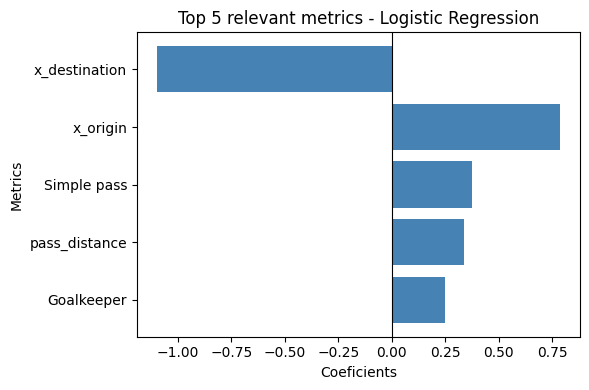

In [68]:
# Retrieving the model's coefficients
coeficients = model.coef_[0]
metrics = ['x_origin', 'y_origin', 'x_destination', 'y_destination',
       'pass_distance', 'match_minute', 'home', 
       'nearby_teammates', 'nearby_defenders', 'destination_defenders', 'team_width',
       'closest_defender_distance_o', 'closest_defender_distance_d',
       'destination_distance_to_goal', 
        'Defender', 'Forward', 'Goalkeeper', 'Midfielder', 
        'Hand pass', 'Head pass', 'High pass', 'Launch', 'Simple pass', 'Smart pass', 
        'agressive_pass', 'conservative_pass', 
        'backward_pass', 'forward_pass', 'horizontal_pass',
       'atacking_zone_x', 'midfield_zone_x', 'own_field_zone_x',
       'central_zone_y', 'wing_zone_y', 
        'Midday', 'Morning', 'Night']

# Obtention of the data-frame ordered by coefficient absolute values
df_coeficients = pd.DataFrame({'Metrics': metrics, 'Coeficients': coeficients})
df_top = df_coeficients.reindex(df_coeficients['Coeficients'].abs().sort_values(ascending = False).index).head(5)

# Visualizing the weight of each metric's coefficient using a horizontal bar chart
plt.figure(figsize = (6, 4))
plt.barh(df_top['Metrics'], df_top['Coeficients'], color = 'steelblue')
plt.axvline(0, color = 'black', linewidth = 0.8)  # línea vertical en 0
plt.title('Top 5 relevant metrics - Logistic Regression')
plt.xlabel('Coeficients')
plt.ylabel('Metrics')
plt.gca().invert_yaxis()  # So that the most important appears at the top
plt.tight_layout()
plt.show()

It can be observed that the main metrics influencing the success or failure of a pass carry different weights and tendencies in the model. A positive coefficient for a metric indicates that as its value increases, the probability of a successful pass increases. Conversely, a negative coefficient means that higher values of that metric are associated with a lower probability of success.

- Variables such as _x_destination_ have negative weights in the model. This implies that the further forward the destination of a pass is on the pitch (higher x values), the lower its likelihood of being successful. This is logical considering that passes aimed deep into the opponent’s half tend to be under more pressure, and the chance of completion drops. In football, forward passes, especially those that are long, threaded, or played behind the defensive line, are among the most difficult to execute successfully. <br><br>

- The model has also learned that passes made by goalkeepers, are likely to be successful, which makes sense. Goalkeepers tend to attempt passes only when there is a very high probability of success. Otherwise, they opt to clear the ball directly, avoiding the risk of a pass that could result in a goal against their team.   <br><br>

- On the other hand, the model has identified that simple_pass contributes positively to pass success, which is intuitive. Simple passes are typically safe actions intended to retain possession, and as such, they are more likely to be successful. <br><br>

- Regarding player position, it is seen that an advanced x-coordinate (i.e., the passer is positioned further up the pitch) is positively associated with pass success. This may be due to the fact that once players reach attacking zones, they tend to make more cautious and calculated passes to avoid losing possession after gaining so much ground. Although pressure may still be high, passes in these zones are made with greater care to maintain control. <br><br>


These are the weights the model has assigned to each variable in order to best predict whether a pass will succeed or fail. However, it’s important to note that it is not just individual variables that determine the final probability of success, but the combined influence of all features used by the model. In other words, the overall prediction is the result of the interplay among all variables included in the training data. 

### 5. Data Visualization 📊📈

Some interesting characteristics of the passing model can be converted into useful visualizations. One of the most useful visualizations that can be generated from the model is a heatmap showing how the predicted probability of pass success varies depending on the (x, y) location on the pitch where the pass is made.

In [69]:
# Function to draw the football field
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np


ww = 105
hh = 68


# transforming [0,1] range points to meters
def point_to_meters(p, width=ww, height=hh):
     return np.array([p[0] * width, p[1] * height])


# transforming meters range points to [0,1] range points
def meters_to_points(p,  width=ww, height=hh):
    return np.array([p[0] / float(width), p[1] / float(height)])
 
    
def draw_field(fig_size=8, lines_color="#bcbcbc", background_color="white"):
    """
    Draw a 2D football field
    """
    ratio = ww / float(hh)
    f, ax = plt.subplots(1, 1, figsize=(fig_size * ratio, fig_size), dpi=100)

    ax.add_patch(patches.Rectangle((0, 0), ww, hh, color=background_color))

    line_pts = [
        [point_to_meters([0, 0]), point_to_meters([0, 1])],
        [point_to_meters([1, 0]), point_to_meters([1, 1])],
        [point_to_meters([0, 1]), point_to_meters([1, 1])],  
        [point_to_meters([0, 0]), point_to_meters([1, 0])],
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-', alpha=0.8,
                lw=1.5, zorder=2, color=lines_color)

    line_pts = [
        [point_to_meters([0.5, 0]), point_to_meters([0.5, 1])],

        [[0, 24.85], [0, 2.85]],
        [[0, 13.85], [16.5, 13.85]],
        [[0, 54.15], [16.5, 54.15]],
        [[16.5, 13.85], [16.5, 54.15]],

        [[0, 24.85], [5.5, 24.85]],
        [[0, 43.15], [5.5, 43.15]],
        [[5.5, 24.85], [5.5, 43.15]],

        [[105, 24.85], [105, 2.85]],
        [[105, 13.85], [88.5, 13.85]],
        [[105, 54.15], [88.5, 54.15]],
        [[88.5, 13.85], [88.5, 54.15]],

        [[105, 24.85], [99.5, 24.85]],
        [[105, 43.15], [99.5, 43.15]],
        [[99.5, 24.85], [99.5, 43.14]]
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], 'w-',
                alpha=0.8, lw=1.5, zorder=2, color=lines_color)
    
    # Circles
    ax.add_patch(patches.Wedge((94.0, 34.0), 9, 128, 232, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    ax.add_patch(patches.Wedge((11.0, 34.0), 9, 308, 52, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    ax.add_patch(patches.Wedge((52.5, 34), 9.5, 0, 360, fill=True, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    plt.axis('off')
    
    return ax

In [70]:
# Test data with associated predicted probabilities of success are used for the analysis
X_test_df = X_test_df.copy()
X_test_df['prob_predicted'] = y_probs

# Only the three relevant variables are retained for this analysis
df_plot = X_test_df[['x_origin', 'y_origin', 'prob_predicted']]

# The x and y variables, previously normalized to the [0, 1] scale, are converted back to pitch dimensions for visualization
# Where: ww = 105 and hh = 68
df_plot = df_plot.copy()
df_plot['x'] = df_plot['x_origin'] * 1.05
df_plot['y'] = df_plot['y_origin'] * 0.68

# The heatmap will be generated by dividing the pitch into 10 horizontal and 6 vertical regions (n_bins_x = 10, n_bins_y = 6)
def assignar_bin_x(x):
    if x <= (105/10)*1:
        return 0
    elif x <= (105/10)*2:
        return 1
    elif x <= (105/10)*3:
        return 2
    elif x <= (105/10)*4:
        return 3
    elif x <= (105/10)*5:
        return 4
    elif x <= (105/10)*6:
        return 5
    elif x <= (105/10)*7:
        return 6
    elif x <= (105/10)*8:
        return 7
    elif x <= (105/10)*9:
        return 8
    elif x <= (105/10)*10:
        return 9
    else:
        return None
    
def assignar_bin_y(y):
    if y <= (68/6)*1:
        return 0
    elif y <= (68/6)*2:
        return 1
    elif y <= (68/6)*3:
        return 2
    elif y <= (68/6)*4:
        return 3
    elif y <= (68/6)*5:
        return 4
    elif y <= (68/6)*6:
        return 5
    else:
        return None

# Each record is assigned to its corresponding x and y bin
df_plot['x_bin'] = df_plot['x'].apply(assignar_bin_x)
df_plot['y_bin'] = df_plot['y'].apply(assignar_bin_y)

# The data are grouped and converted into a matrix containing the mean predicted probability in each xy bin
mapa_calor = df_plot.groupby(['x_bin', 'y_bin'])['prob_predicted'].mean().unstack()

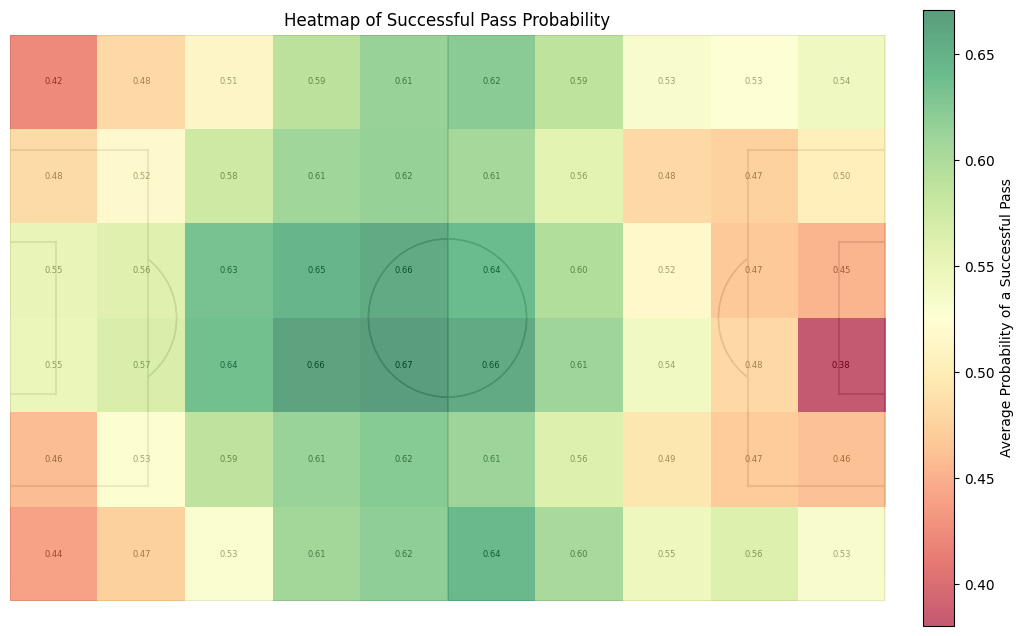

In [71]:
# A library is imported to suppress warning messages
import warnings
warnings.filterwarnings('ignore')

# The pitch is drawn
ax = draw_field()

# The heatmap is drawn
im = ax.imshow(mapa_calor.T, origin = 'lower', extent = [0, 105, 0, 68], cmap = 'RdYlGn', alpha = 0.65, zorder = 4)

# The mean probability values are added to the plots
for x_bin in range(mapa_calor.shape[0]):
    for y_bin in range(mapa_calor.shape[1]):
        value = mapa_calor.iloc[x_bin, y_bin]
        if not np.isnan(value):
            # The center position of each bin is calculated in order to place the text
            x_centre = (x_bin + 0.5) * (105 / mapa_calor.shape[0])
            y_centre = (y_bin + 0.5) * (68 / mapa_calor.shape[1])
            ax.text(x_centre, y_centre, f"{value:.2f}", ha = 'center', va = 'center', fontsize = 6, color = 'black')

# Color Bar
cbar = plt.colorbar(im, ax = ax, fraction = 0.046, pad = 0.04)
cbar.set_label('Average Probability of a Successful Pass')

plt.title('Heatmap of Successful Pass Probability')
plt.show()

The heatmap allows for the extraction of insights regarding the patterns the model has learned in relation to the origin location of passes and their likelihood of success. <br><br>

The lowest predicted pass success probabilities are found in the areas closest to the opponent’s goal, which is consistent with expectations: this zone is typically densely populated with defenders who aim to intercept any attacking passes. Within the penalty area, the central zones show a lower success rate compared to the corners, where the defensive threat is slightly reduced. <br><br>

As the x-position shifts back toward the midfield, the predicted success probability increases. Although values rarely reach 80% or 90%, the central midfield zone displays the highest predicted success rates, typically around 63%. From a footballing perspective, this makes sense, as the midfield is where play is organized and possession is built. Precision is crucial in this area, and players aim to avoid losing the ball. However, this zone is also highly contested, often congested with opposing players who apply pressure, which tempers the overall success rate. <br><br>

Moving further back on the pitch, the probability of success begins to decrease again, although not as sharply as near the opponent’s goal. This is explained by the fact that these deep areas are usually used less frequently for passing. Teams may play out from the back, but typically focus their passing efforts in more advanced areas of the field. Passes made close to a team’s own goal are generally a response to high pressing from the opposition and carry greater risk, which explains the lower success rates, often around 50%. <br><br>

In the zones immediately in front of the team’s own goal, pass success probability remains relatively low, though still higher than near the opponent’s goal. This can be attributed to the team having more control and structure when initiating play from the back. Players are well-positioned, and the build-up is deliberate. In contrast, play near the opponent’s goal involves breaking into a well-defended, high-pressure zone, where opponents are fully organized to prevent scoring opportunities. Moreover, passes near one’s own goal are rare and typically made only when necessary due to the high risk associated with losing possession in that area. <br><br>


As for the wide areas, they generally show lower predicted success probabilities compared to adjacent central zones, particularly near the team's own goal and the opponent's goal. This can be explained by the reduced passing options available near the touchlines and the fact that defensive pressure is easier to apply in these spaces, making successful passes more difficult.

In [ ]:
#grafico que muestre la probabilidad mediana de exito de pase en funcion de posicion del jugador...

In [76]:
X_test_df.head(3)

,x_origin,y_origin,x_destination,y_destination,pass_distance,match_minute,home,nearby_teammates,nearby_defenders,destination_defenders,team_width,closest_defender_distance_o,closest_defender_distance_d,destination_distance_to_goal,Defender,Forward,Goalkeeper,Midfielder,Hand pass,Head pass,High pass,Launch,Simple pass,Smart pass,agressive_pass,conservative_pass,backward_pass,forward_pass,horizontal_pass,atacking_zone_x,midfield_zone_x,own_field_zone_x,central_zone_y,wing_zone_y,Midday,Morning,Night,prob_predicted
35188,35,89,11,60,31.998725,30.0,0,0.0,0.0,2.0,61.0,20.695280,6.612399,93.697078,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0.920751
18162,37,29,58,3,28.262783,4.0,1,2.0,1.0,0.0,68.0,4.176932,22.455959,54.463305,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0.641699
259526,74,7,65,2,10.043032,37.0,0,1.0,0.0,0.0,77.0,10.950017,19.538108,49.152132,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0.632488


In [78]:
# Total events of the Goalkeepers
X_test_df_gk = X_test_df[X_test_df['Goalkeeper'] == 1]
probab_gk = X_test_df_gk['prob_predicted'].sum()
m_probab_gk = probab_gk / X_test_df_gk.shape[0]

# Total events of the Defender players
X_test_df_def = X_test_df[X_test_df['Defender'] == 1]
probab_def = X_test_df_def['prob_predicted'].sum()
m_probab_def = probab_def / X_test_df_def.shape[0]

# Total events of the Midfield players
X_test_df_mid = X_test_df[X_test_df['Midfielder'] == 1]
probab_mid = X_test_df_mid['prob_predicted'].sum()
m_probab_mid = probab_mid / X_test_df_mid.shape[0]

# Total events of the Forward players
X_test_df_fw = X_test_df[X_test_df['Forward'] == 1]
probab_fw = X_test_df_fw['prob_predicted'].sum()
m_probab_fw = probab_fw / X_test_df_fw.shape[0]    

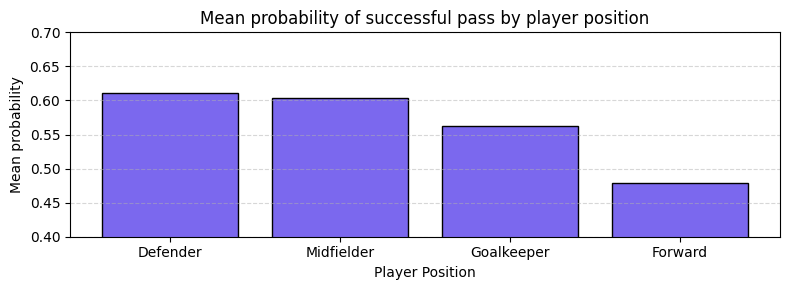

In [86]:
# Diccionario con tus valores
avg_probs = {
    'Goalkeeper': m_probab_gk,
    'Defender': m_probab_def,
    'Midfielder': m_probab_mid,
    'Forward': m_probab_fw
}

# Ordenarlo (opcional)
avg_probs = dict(sorted(avg_probs.items(), key=lambda item: item[1], reverse=True))

# Crear gráfico de barras
plt.figure(figsize=(8, 3))
plt.bar(avg_probs.keys(), avg_probs.values(), color='mediumslateblue', edgecolor='black')

plt.title('Mean probability of successful pass by player position')
plt.ylabel('Mean probability')
plt.xlabel('Player Position')
plt.ylim(0.4, 0.7)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In this figure, the observed patterns align with expectations. Forwards exhibit the lowest average successful pass probability among all player roles. This is primarily due to their advanced positioning on the field and their primary function: to create danger and destabilize the opposing team in order to generate goal-scoring opportunities. This role inherently involves taking greater risks and attempting passes that are less secure and less likely to succeed.

The positions with the highest pass success probability are defenders and midfielders. These are structurally critical roles responsible for building up play, where maintaining possession is essential. Errors in these areas of the pitch tend to be particularly costly, making pass accuracy a priority.

Finally, it is notable that although goalkeepers occupy the most critical position in terms of the consequences of a failed pass, their average pass success rate is not as high as that of defenders or midfielders. This can be attributed to the fact that goalkeepers are frequently forced to make long passes under pressure from opponents. Such long passes—where the ball remains airborne for extended periods—are inherently difficult to execute with precision and allow the opposing team ample time to organize and contest possession at the point of reception, often with the advantage of facing the ball directly.